# ECE 6254 - Statistical Machine Learning
## Project - Loonie
### Mathematical Analysis of Undersampling 

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics

### Let start simple in 1 Dimension

In [2]:
pi_mi = 0.2    # Proportion of minority class
N = 1e7       # Total number of samples
mu_mi = 0
sigma_mi = 3
mu_ma = 3
sigma_ma = 3

In [3]:
x_mi = np.random.normal(loc=mu_mi, scale=sigma_mi, size=(int(pi_mi*N), 1))
x_ma = np.random.normal(loc=mu_ma, scale=sigma_ma, size=(int((1-pi_mi)*N), 1))

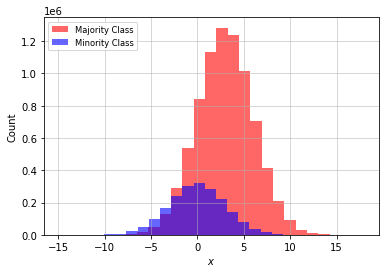

In [4]:
# Plot the histogram.
plt.hist(x_ma, bins=25, alpha=0.6, color='r', label='Majority Class')
plt.hist(x_mi, bins=25, alpha=0.6, color='b', label='Minority Class')

plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$")
plt.ylabel("Count")
plt.legend(loc='upper left',fontsize='small')
#plt.title('Sample count')

In [5]:
Beta = 0.25 # Probability of selecting a sample from the majority class
x_ma_undersampled = x_ma[random.sample(range(1, int((1-pi_mi)*N)),int(Beta*(1-pi_mi)*N))]

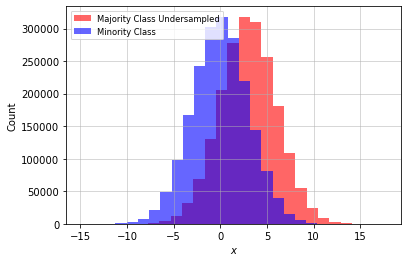

In [6]:
# Plot the histogram.
plt.hist(x_ma_undersampled, bins=25, alpha=0.6, color='r', label='Majority Class Undersampled')
plt.hist(x_mi, bins=25, alpha=0.6, color='b', label='Minority Class')

plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$")
plt.ylabel("Count")
plt.legend(loc='upper left',fontsize='small')

## 1. Complexity of Hypothesis Set
Undersampling removes samples from the majority dataset. The number of samples available limits the complexity of the hypothesis dataset over which the ML algorithm can generalize.
<br><br>
This consequence should be addressed in the report but no specific coding is needed.

## 2. Sampling Selection Bias
https://www3.nd.edu/~dial/publications/dalpozzolo2015calibrating.pdf <br>


### Posterior Probability

Text(0.5, 0, '$x$')

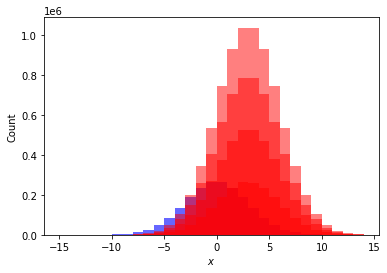

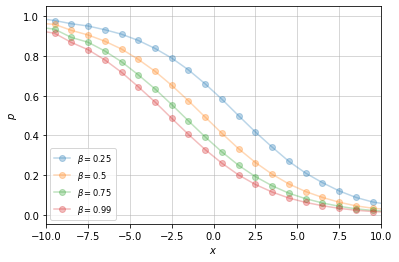

In [19]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
n_mi, bin_mi, bars = ax1.hist(x_mi, bins=range(-15, 15, 1), alpha=0.6, color='b', label='Minority Class')

Beta_opt = [0.25, 0.5, 0.75, 0.99] # Probability of selecting a sample from the majority class
for ii in range(0, len(Beta_opt)):
    x_ma_undersampled = x_ma[random.sample(range(1, int((1-pi_mi)*N)),int(Beta_opt[ii]*(1-pi_mi)*N))]
    n_ma, bin_ma, bars = ax1.hist(x_ma_undersampled, bins=range(-15, 15, 1), alpha=0.5, color='r', label=['Majority Class Undersampled with B='+str(Beta_opt[ii])])

    ind=np.where((n_mi+n_ma)>0)
    p_us_mi= n_mi[ind]/(n_mi[ind]+n_ma[ind])
    
    ax2.plot(bin_ma[ind]+0.5, p_us_mi,  'o-',  alpha=0.3, label=r'$\beta = $'+str(Beta_opt[ii]))

    
    
plt.xlabel("$x$")
plt.ylabel("$p$")
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.legend(loc='lower left',fontsize='small')
plt.xlim([-10,10])

ax1.set_ylabel('Count')
ax1.set_xlabel('$x$')

As $\Beta$ decreases the posterior probability, $P(\mathrm{minority}|x)$, decreases. In other words, removing samples with undersampling moves the classification boundary so that more samples are classified as the minority. The stronger
the undersampling, the larger the shift.

## 3. Sample Variance

In [76]:
Beta_opt_percentage = [5,10,15,20,25,40,60,80,95]
variance = [0] * len(Beta_opt_percentage)
pvariance = [0] * len(Beta_opt_percentage)
iterations = 5000
for iter in range(0, iterations):
    x = np.random.normal(loc=0, scale=10, size=(1000, 1))
    for jj in range(0, len(Beta_opt_percentage)):
        x_undersampled = x[random.sample(range(1, 1000), Beta_opt_percentage[jj]*10)]
        variance[jj] = variance[jj] + statistics.variance(x_undersampled[:, 0])
        pvariance[jj] = pvariance[jj] + statistics.pvariance(x_undersampled[:, 0])

In [77]:
variance = [x / iterations for x in variance]
pvariance = [x / iterations for x in pvariance]

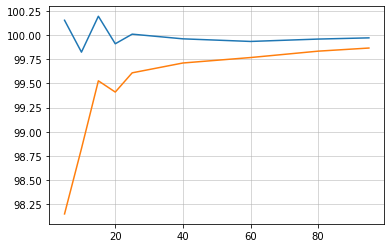

In [78]:
plt.plot(Beta_opt_percentage, variance)
plt.plot(Beta_opt_percentage, pvariance)
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)

# To-Do
* Understand what variance to use, and what is the impact of $\Beta$ and why
* Redo in 2D, with mutivariate Gaussians